In [23]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, precision_score,f1_score, recall_score, accuracy_score
import seaborn as sns
from pprint import pprint
sns.set(style="white")
sns.set(style ="whitegrid", color_codes = True)
import os as os
import xgboost
path = '/Users/apple/Downloads/data/'
os.chdir(os.path.join(path))
os.getcwd()
#from warnings import simplefilter
# ignore all future warnings
#simplefilter(action='ignore', category=FutureWarning)

'/Users/apple/Downloads/data'

In [24]:
obesity = pd.read_csv('obesity.csv',sep= ",")
obesity.rename({'NObeyesdad' : 'Target',
                'family_history_with_overweight': 'Overweight'}, axis=1, inplace= True)
replace_vals = {'Normal_Weight' : 0, 
                'Overweight_Level_I': 0,
                'Overweight_Level_II': 1,
                'Obesity_Type_I' : 1,
                'Insufficient_Weight': 0,
                'Obesity_Type_II' : 1,
                'Obesity_Type_III': 1
                }
obesity.replace({'Target' : replace_vals}, inplace= True)
num_cols = [i for i in obesity.columns if obesity[i].dtypes == 'float64']
cat_cols = [i for i in obesity.columns if obesity[i].dtypes == 'O']

In [25]:
obesity[num_cols].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [26]:
obesity[cat_cols].describe()

,Gender,Overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,1068,1726,1866,1765,2067,2015,1401,1580


## Visualizations Univariate/ Bivariate/ Multiple columns 

Text(0.5, 1.0, 'Distribution of Obesity with Age')

<Figure size 700x500 with 0 Axes>

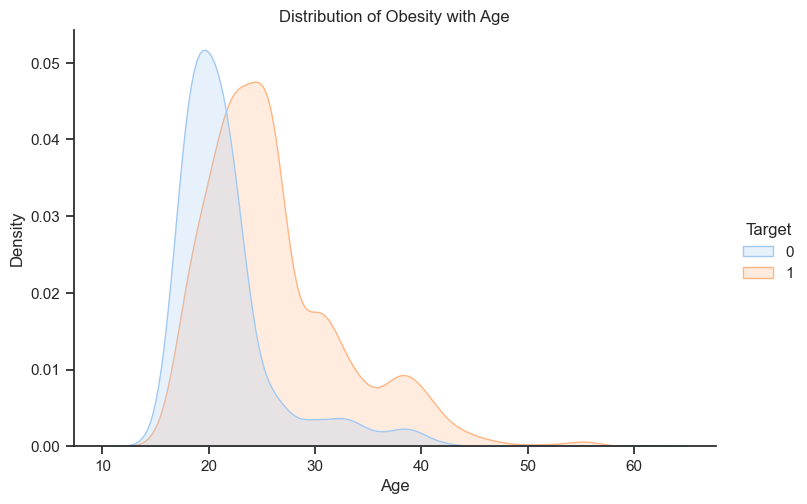

In [27]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize=(7,5))
sns.displot(data = obesity, x = 'Age', hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
plt.title("Distribution of Obesity with Age")

<Figure size 600x300 with 0 Axes>

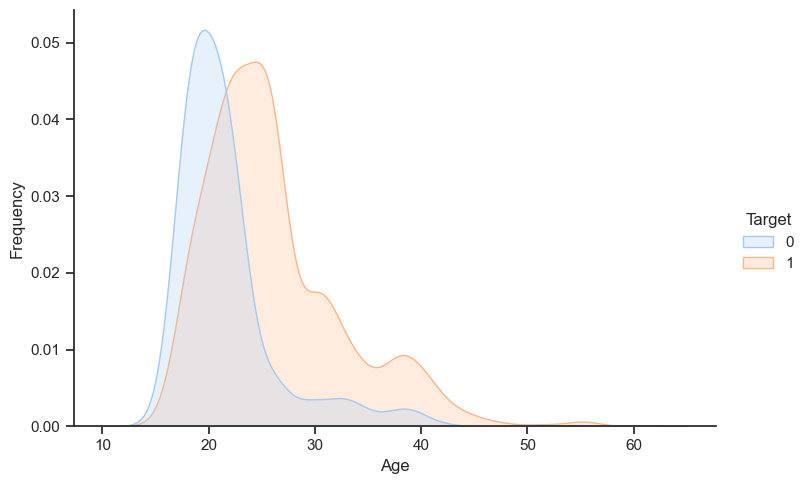

<Figure size 640x480 with 0 Axes>

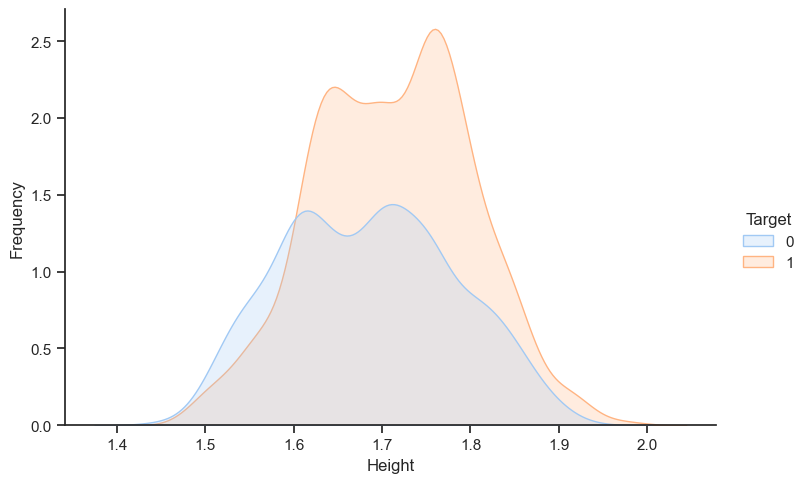

<Figure size 640x480 with 0 Axes>

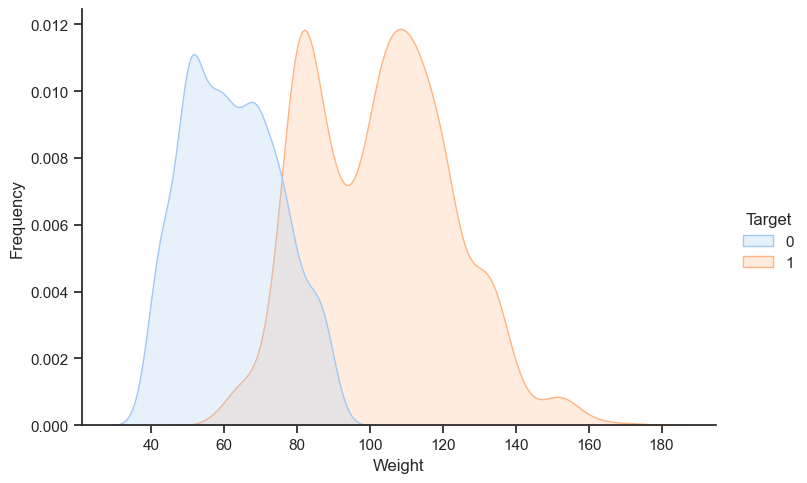

<Figure size 640x480 with 0 Axes>

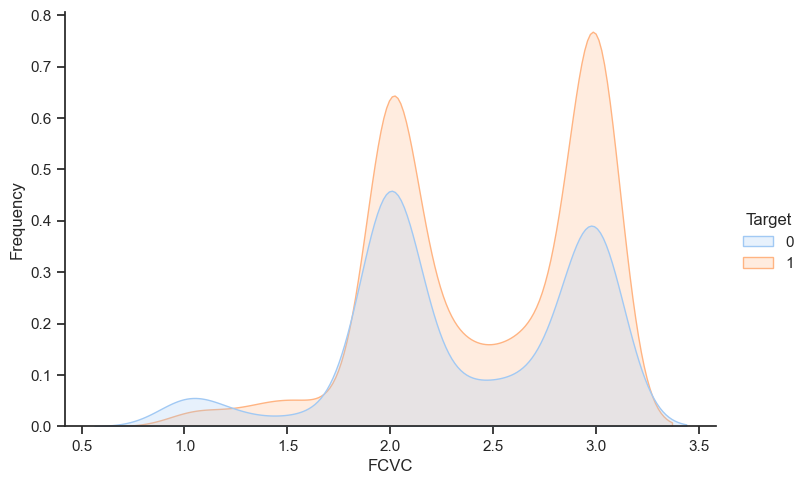

<Figure size 640x480 with 0 Axes>

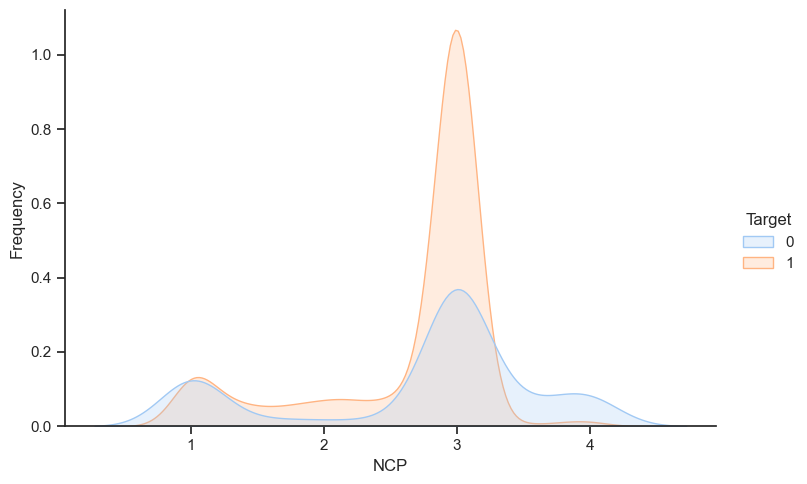

<Figure size 640x480 with 0 Axes>

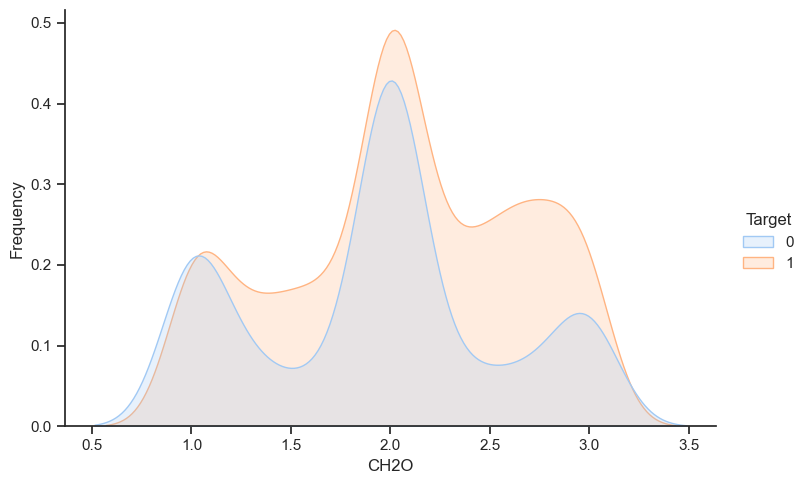

<Figure size 640x480 with 0 Axes>

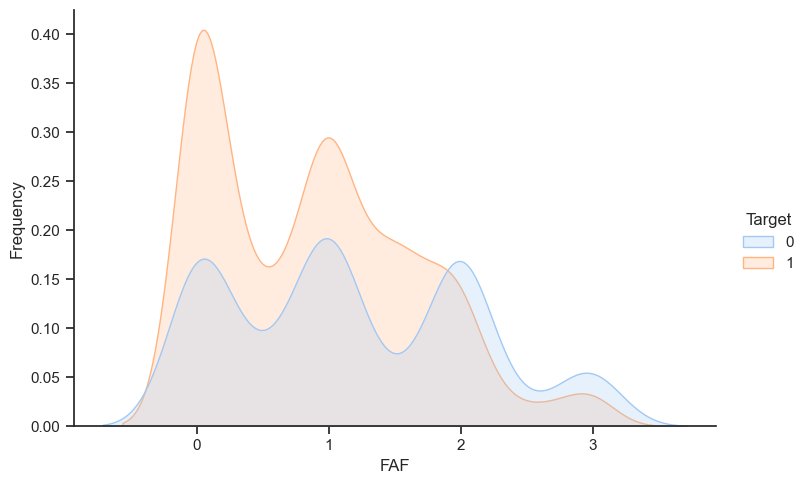

<Figure size 640x480 with 0 Axes>

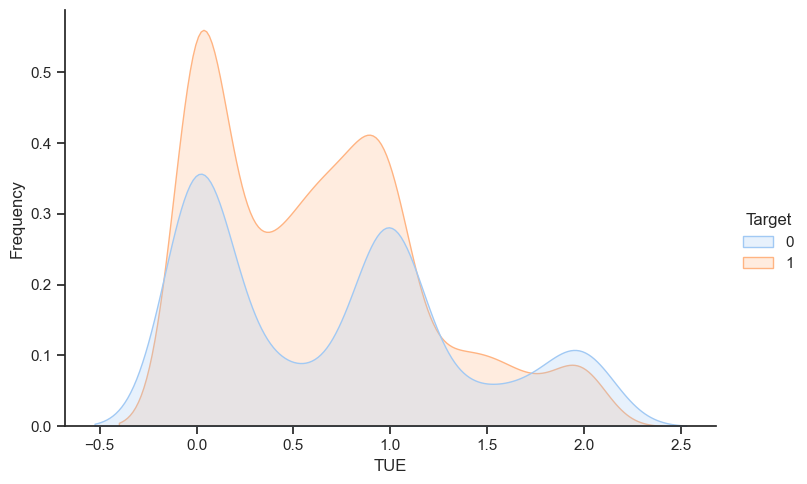

In [28]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.displot(data = obesity, x = col, hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


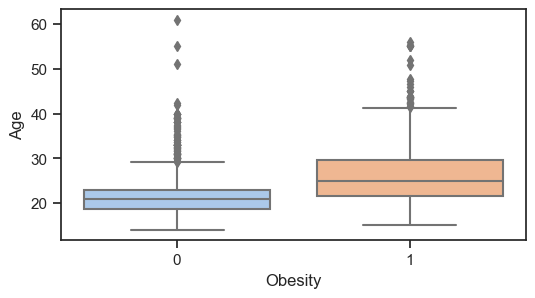

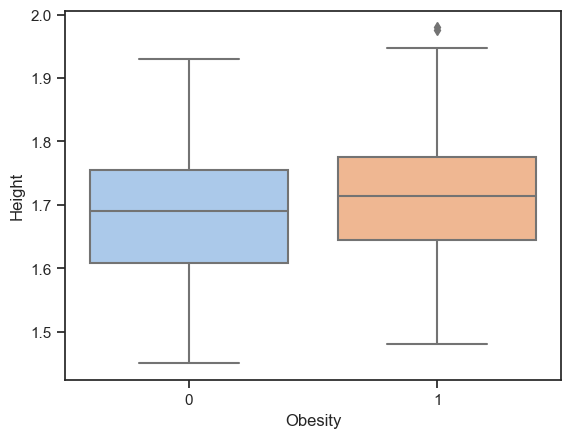

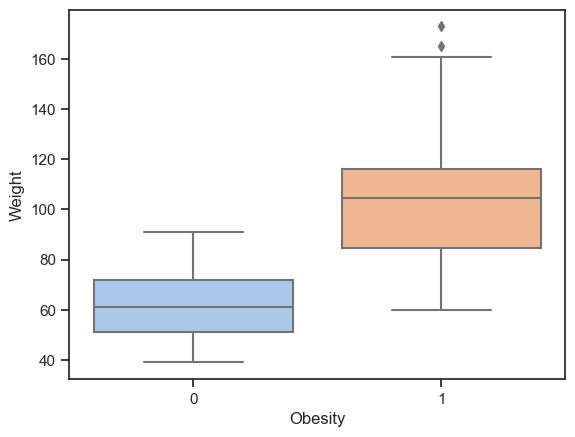

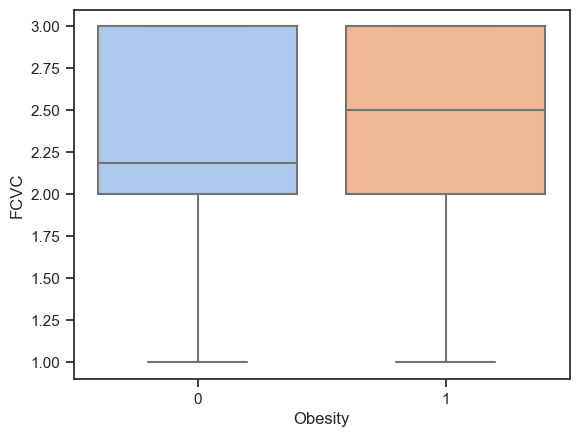

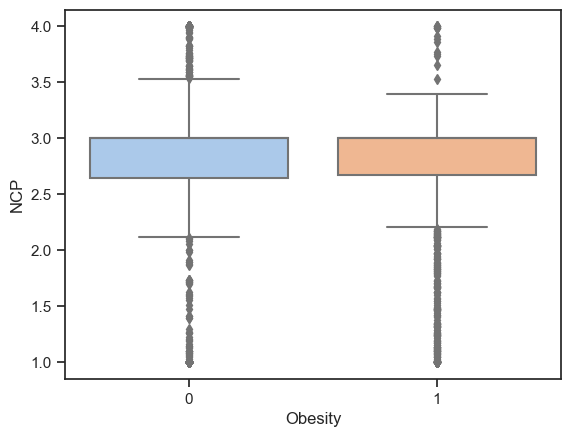

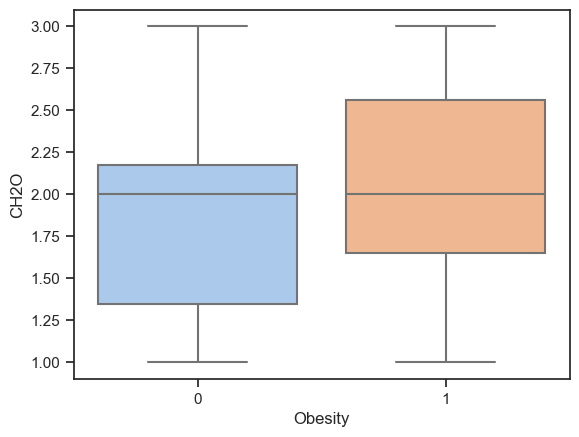

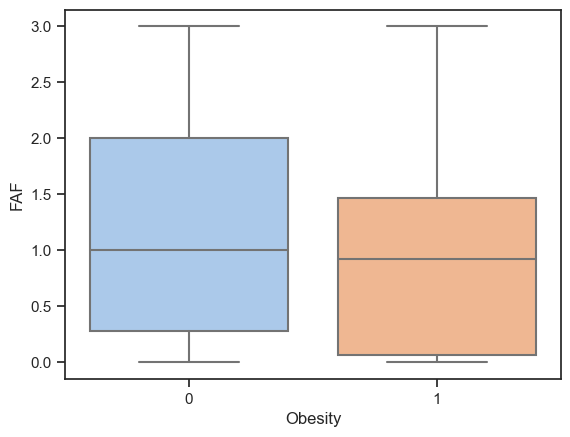

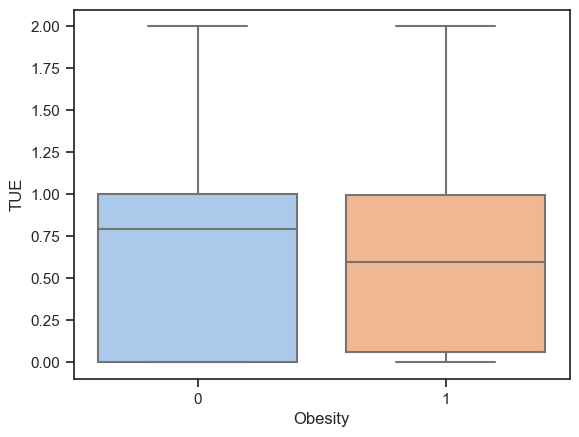

In [29]:
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.boxplot(data = obesity, x = 'Target' ,y =  col, palette= "pastel")
    plt.xlabel('Obesity')
    plt.ylabel(col)
    plt.show()

## Train/Test Split of the data set
## One hot encoding and feature scaling 

In [30]:
obesity.isnull().mean().sort_values(ascending= False)
obesity.isnull().sum().sort_values(ascending= False)

Gender        0
SMOKE         0
MTRANS        0
CALC          0
TUE           0
FAF           0
SCC           0
CH2O          0
CAEC          0
Age           0
NCP           0
FCVC          0
FAVC          0
Overweight    0
Weight        0
Height        0
Target        0
dtype: int64

In [31]:
X_train, X_test , y_train, y_test = train_test_split(obesity.iloc[:, : -1]  , obesity.iloc[:, [-1]])
print(X_train.shape)
print(X_test.shape)

(1583, 16)
(528, 16)


In [32]:
# just for visualization on train and test set
train = pd.merge(X_train, y_train, left_index= True, right_index= True)
test = pd.merge(X_test,y_test, left_index= True ,right_index= True)

<Figure size 600x300 with 0 Axes>

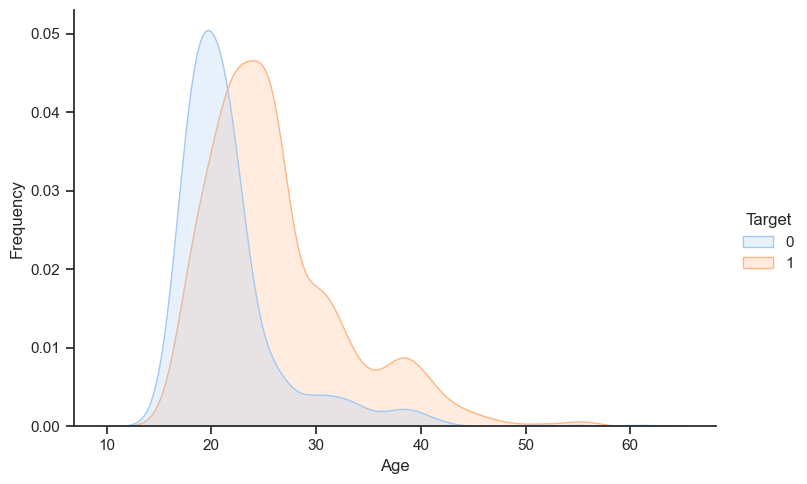

<Figure size 640x480 with 0 Axes>

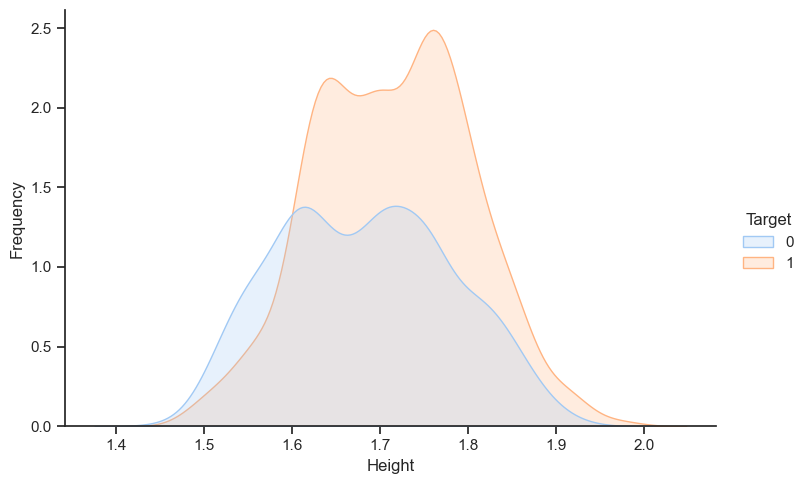

<Figure size 640x480 with 0 Axes>

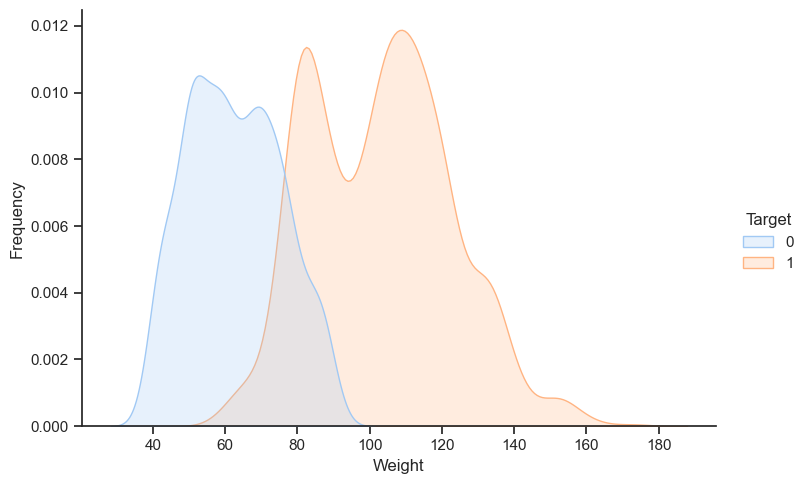

<Figure size 640x480 with 0 Axes>

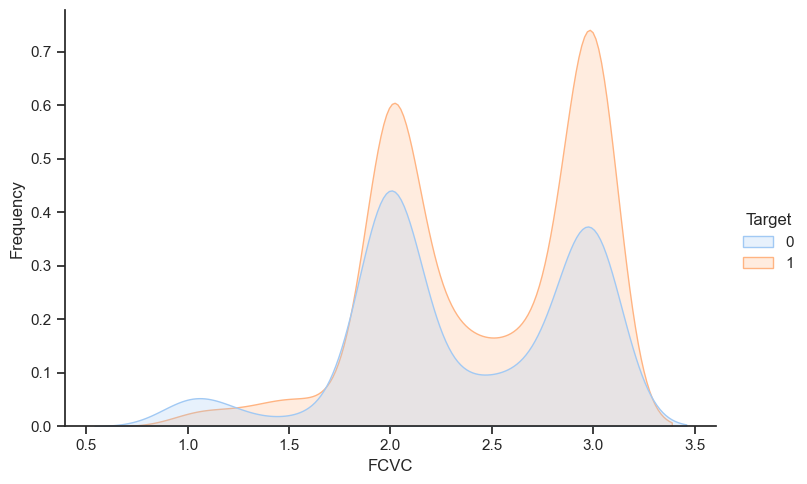

<Figure size 640x480 with 0 Axes>

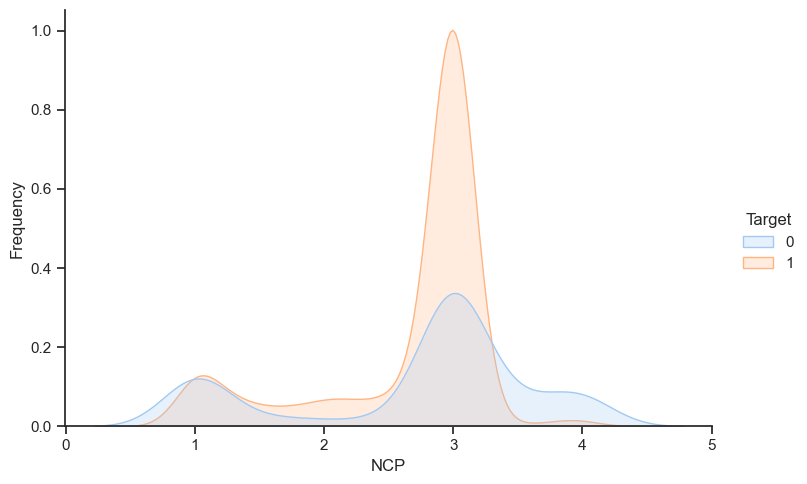

<Figure size 640x480 with 0 Axes>

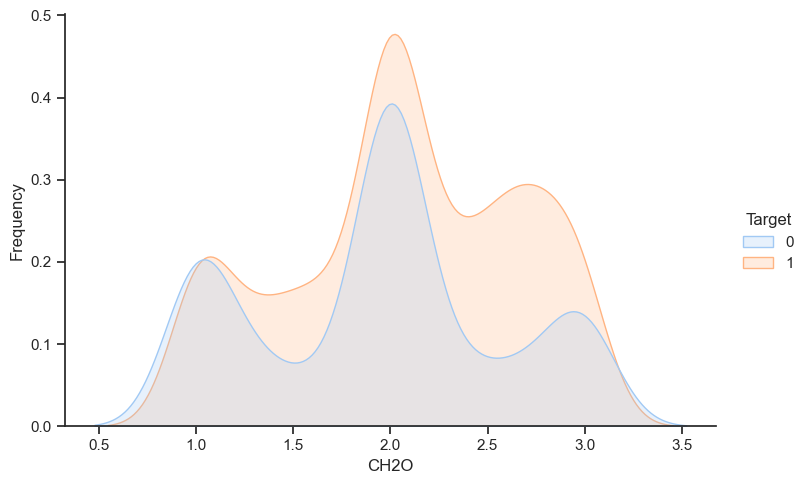

<Figure size 640x480 with 0 Axes>

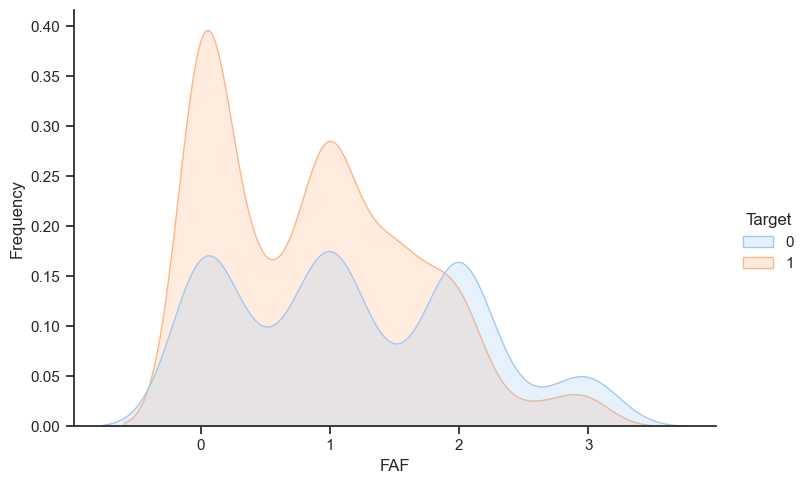

<Figure size 640x480 with 0 Axes>

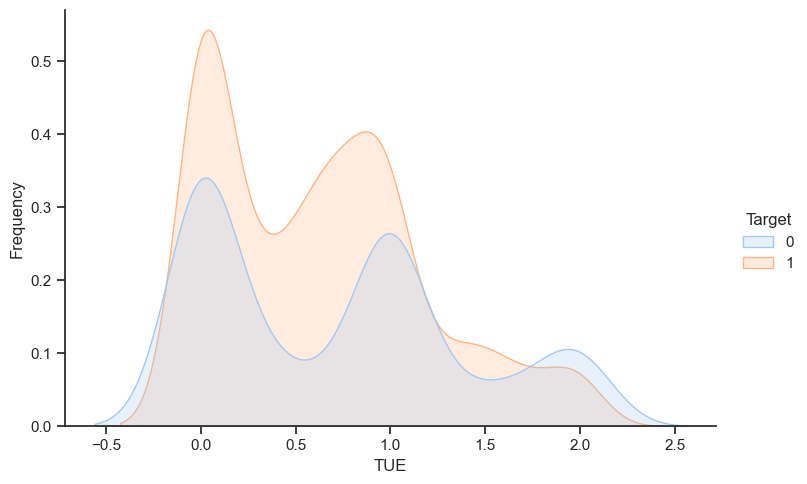

In [33]:
# visualization of train set
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.displot(data = train, hue = 'Target', x = col, kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


<Figure size 600x300 with 0 Axes>

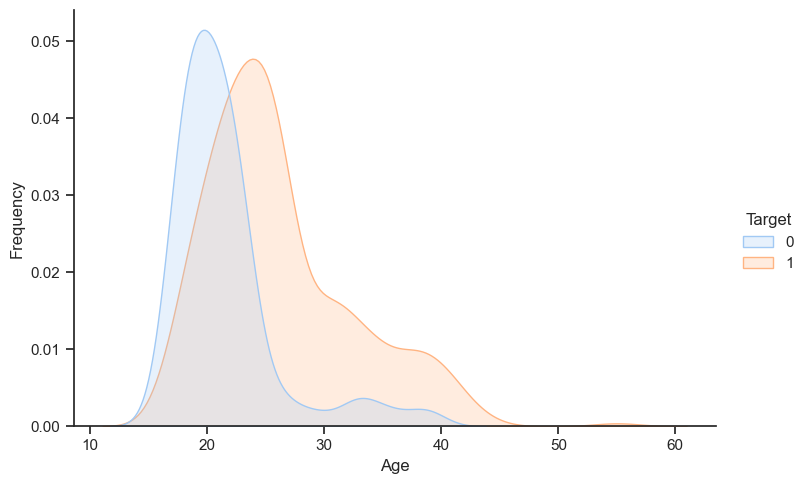

<Figure size 640x480 with 0 Axes>

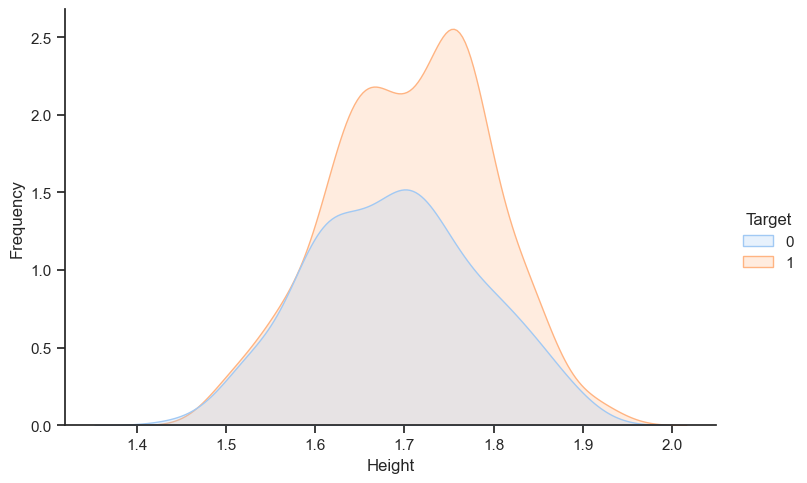

<Figure size 640x480 with 0 Axes>

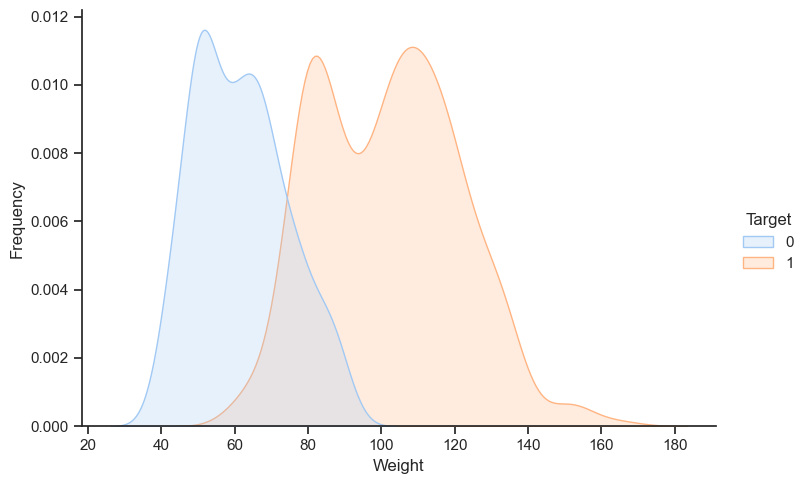

<Figure size 640x480 with 0 Axes>

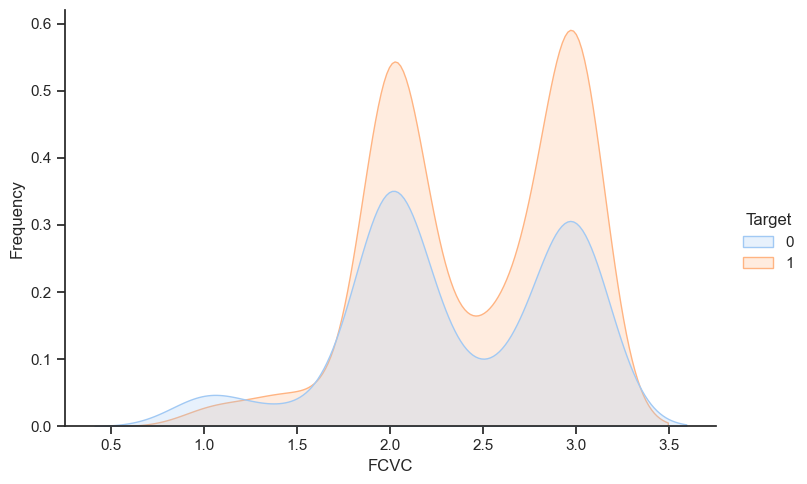

<Figure size 640x480 with 0 Axes>

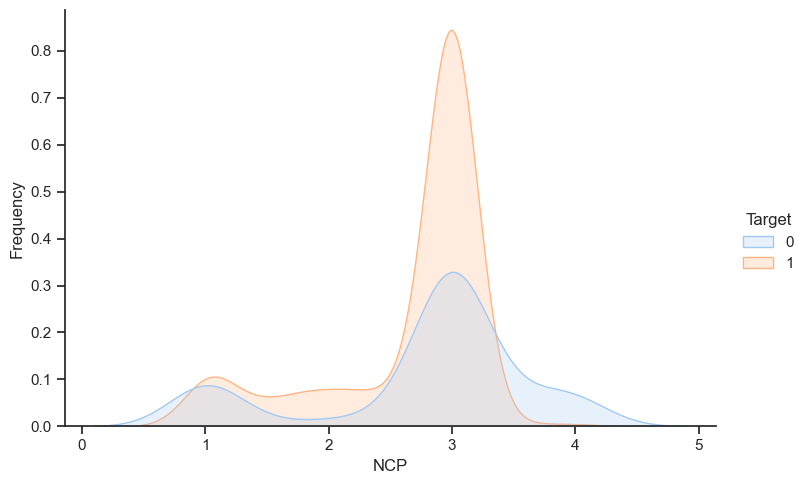

<Figure size 640x480 with 0 Axes>

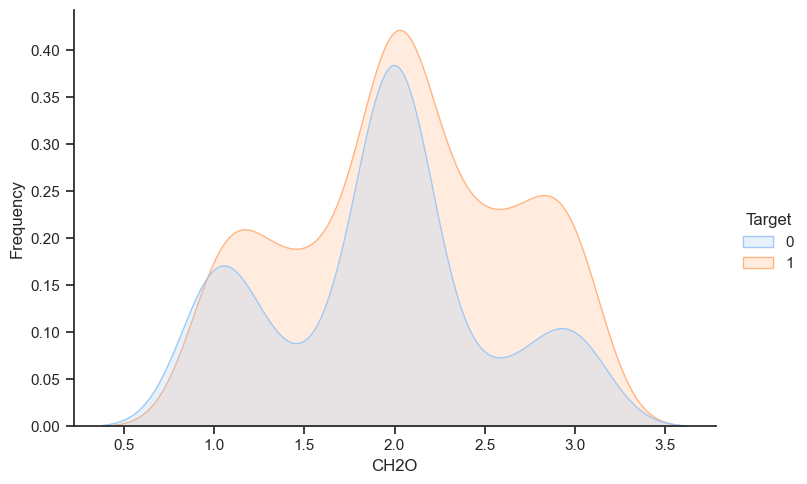

<Figure size 640x480 with 0 Axes>

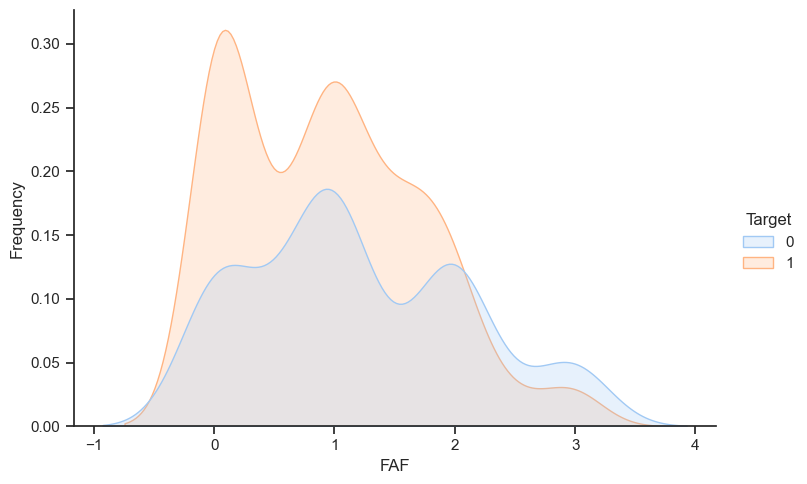

<Figure size 640x480 with 0 Axes>

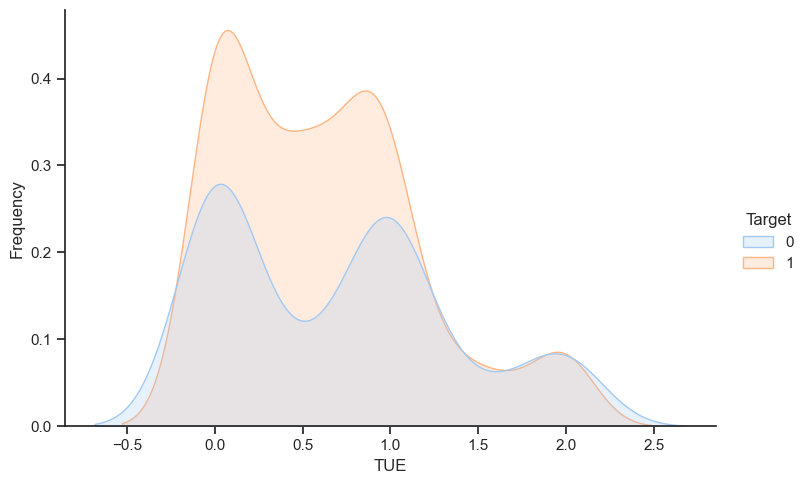

In [34]:
# visualization of test set
sns.set_style("ticks" , {'axes.grid' : False})
plt.figure(figsize = (6,3))
for col in num_cols:
    plt.tight_layout()
    sns.displot(data = test, x = col, hue='Target', kind= 'kde', fill = True, palette= "pastel", height=5, aspect=1.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Standardize or Normalize the data

In [35]:
Scaler = MinMaxScaler()
Scaler.fit(X_train[num_cols])

X_train_Scaled = pd.DataFrame(Scaler.transform(X_train[num_cols]), columns= num_cols)
X_test_Scaled = pd.DataFrame(Scaler.transform(X_test[num_cols]), columns= num_cols)


# One hot encoding pipeline

In [36]:
One_Hot_Encoder = OneHotEncoder(categories = 'auto',
                                drop = 'first',
                                sparse= False)
One_Hot_Encoder.fit(X_train[cat_cols])

X_train_transformed = pd.DataFrame(One_Hot_Encoder.transform(X_train[cat_cols]))
X_test_transformed = pd.DataFrame(One_Hot_Encoder.transform(X_test[cat_cols]))

X_train = pd.merge(X_train_Scaled, X_train_transformed, left_index = True, right_index= True)
X_test = pd.merge(X_test_Scaled, X_test_transformed, left_index = True, right_index= True)


In [37]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)


X_train (1583, 23)
X_test (528, 23)
y_train (1583, 1)
y_test (528, 1)


Grid Search, Model and Predict

In [38]:
param_grid = {'solver' : ['newton-cg',  'liblinear'],
              'penalty' : ['l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
              'max_iter' : [100, 150, 200, 250]
              }

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state= 1)
logReg_grid_search = GridSearchCV(estimator= model, param_grid= param_grid, n_jobs= 1, cv = cv, scoring= 'accuracy')


In [39]:
grid_result = logReg_grid_search.fit(X_train, y_train.values.ravel())

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

In [40]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.981997 using {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [41]:
y_pred = logReg_grid_search.predict(X_test)
y_pred_proba = logReg_grid_search.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

print(classification_report(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
print("overall F1 score:", f1_score(y_test, y_pred))
print('AUC score:', roc_auc_score(y_test, y_pred))
print('accuracy score:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       211
           1       1.00      0.99      0.99       317

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528

Overall Precision: 0.9968253968253968
Overall Recall: 0.9905362776025236
overall F1 score: 0.9936708860759493
AUC score: 0.9928984705548163
accuracy score: 0.9924242424242424


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


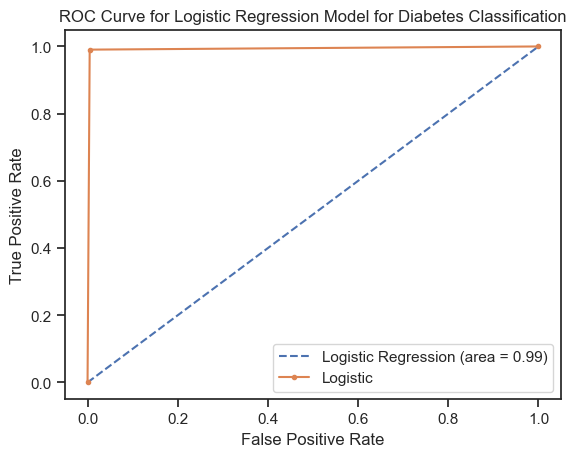

In [42]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholdes = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--',  label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve for Logistic Regression Model for Diabetes Classification')
# show the plot
plt.show()

In [45]:
df_perf = pd.DataFrame(data = [accuracy_score(y_test, y_pred),
                               recall_score(y_test, y_pred),
                               f1_score(y_test, y_pred),
                               precision_score(y_test, y_pred)], index= ["accuracy", "recall", "f1_score", "precision_score"], columns= ["score"])

df_perf

,score
accuracy,0.992424
recall,0.990536
f1_score,0.993671
precision_score,0.996825
